### API = Application Programming Interface
#### Limitations of webscraping
1. Some websites eg. amazon india do not allow web scraping

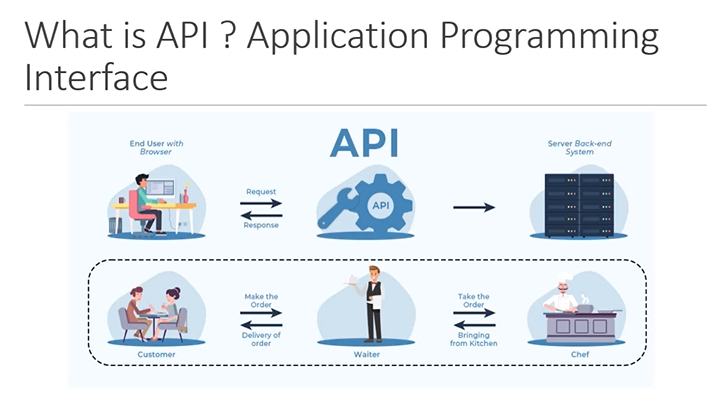

In [1]:
# Connection is through API - we send the request through API to the server and we get response back

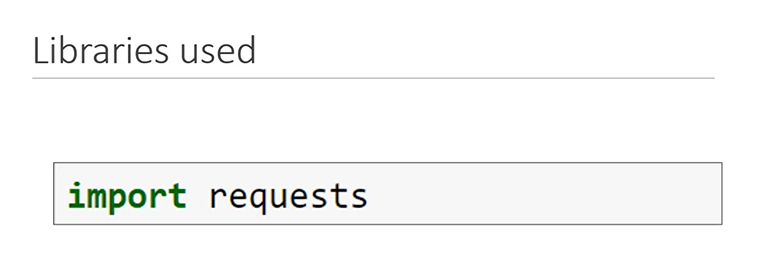

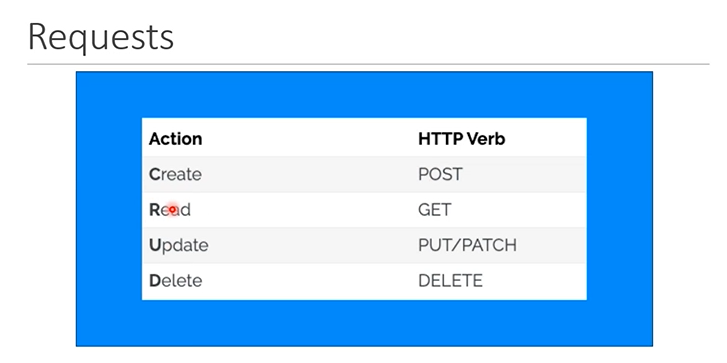
Get requests we will use more often

### To Collect Data on Stock Market - StockMarketAPI 

### For StockMarketAPI we need Alpha Vantage API- [https://rapidapi.com/alphavantage/api/alpha-vantage]

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# Just like passwords we have API key so it need to be secure

In [4]:
# To create a dot file - .env to store secret api keys

In [5]:
# This file doesn't get commited to github file as it comes under gitignore

In [6]:
%pip install python-dotenv 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# With this we can get access to keys in env stored


### Read the API key

In [8]:
from dotenv import load_dotenv
load_dotenv()

True

### if above code is showing true then api key is loaded

In [9]:
import os
api_key = os.getenv("API_KEY")

In [10]:
# WE QUOTE IT LIKE THAT SO IT IS SECURE AND NOT USE BY SOMEBODY ELSE

In [11]:
# WE GET 5 Requests per minute - in this plan for business if we want we can upgrade it

### API Key is loaded

### SYMBOL SEARCH

In [12]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json() # COPY CODE FROM RAPID-API and paste here 

In [13]:
data

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

In [14]:
type(data)

dict

In [15]:
data["bestMatches"]

[{'1. symbol': 'SBIN.BSE',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBKFF',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'United States',
  '5. marketOpen': '09:30',
  '6. marketClose': '16:00',
  '7. timezone': 'UTC-04',
  '8. currency': 'USD',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SID.FRK',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'Frankfurt',
  '5. marketOpen': '08:00',
  '6. marketClose': '20:00',
  '7. timezone': 'UTC+02',
  '8. currency': 'EUR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBID.LON',
  '2. name': 'State Bank of India GDR',
  '3. type': 'Equity',
  '4. region': 'United Kingdom',
  '5. marketOpen': '08:00',
  '6. marketClose': '16:30',
  '7. timezone': 'UTC+01',
  '8. currency': 'USD',
  '9. mat

### Extracting only required details 
### Store name, region, currency for each type

In [16]:
d = {}

for i in data["bestMatches"]:
    symbol = i["1. symbol"]
    d[symbol] = [i["2. name"], i["4. region"], i["8. currency"]]

In [17]:
d

{'SBIN.BSE': ['State Bank of India', 'India/Bombay', 'INR'],
 'SBKFF': ['State Bank of India', 'United States', 'USD'],
 'SID.FRK': ['State Bank of India', 'Frankfurt', 'EUR'],
 'SBID.LON': ['State Bank of India GDR', 'United Kingdom', 'USD']}

In [18]:
# for everything we have different endpoints

### Get actual stock data for state bank pof india SBIN.BSE

In [19]:
# Next endpoint - Time_Series_Daily

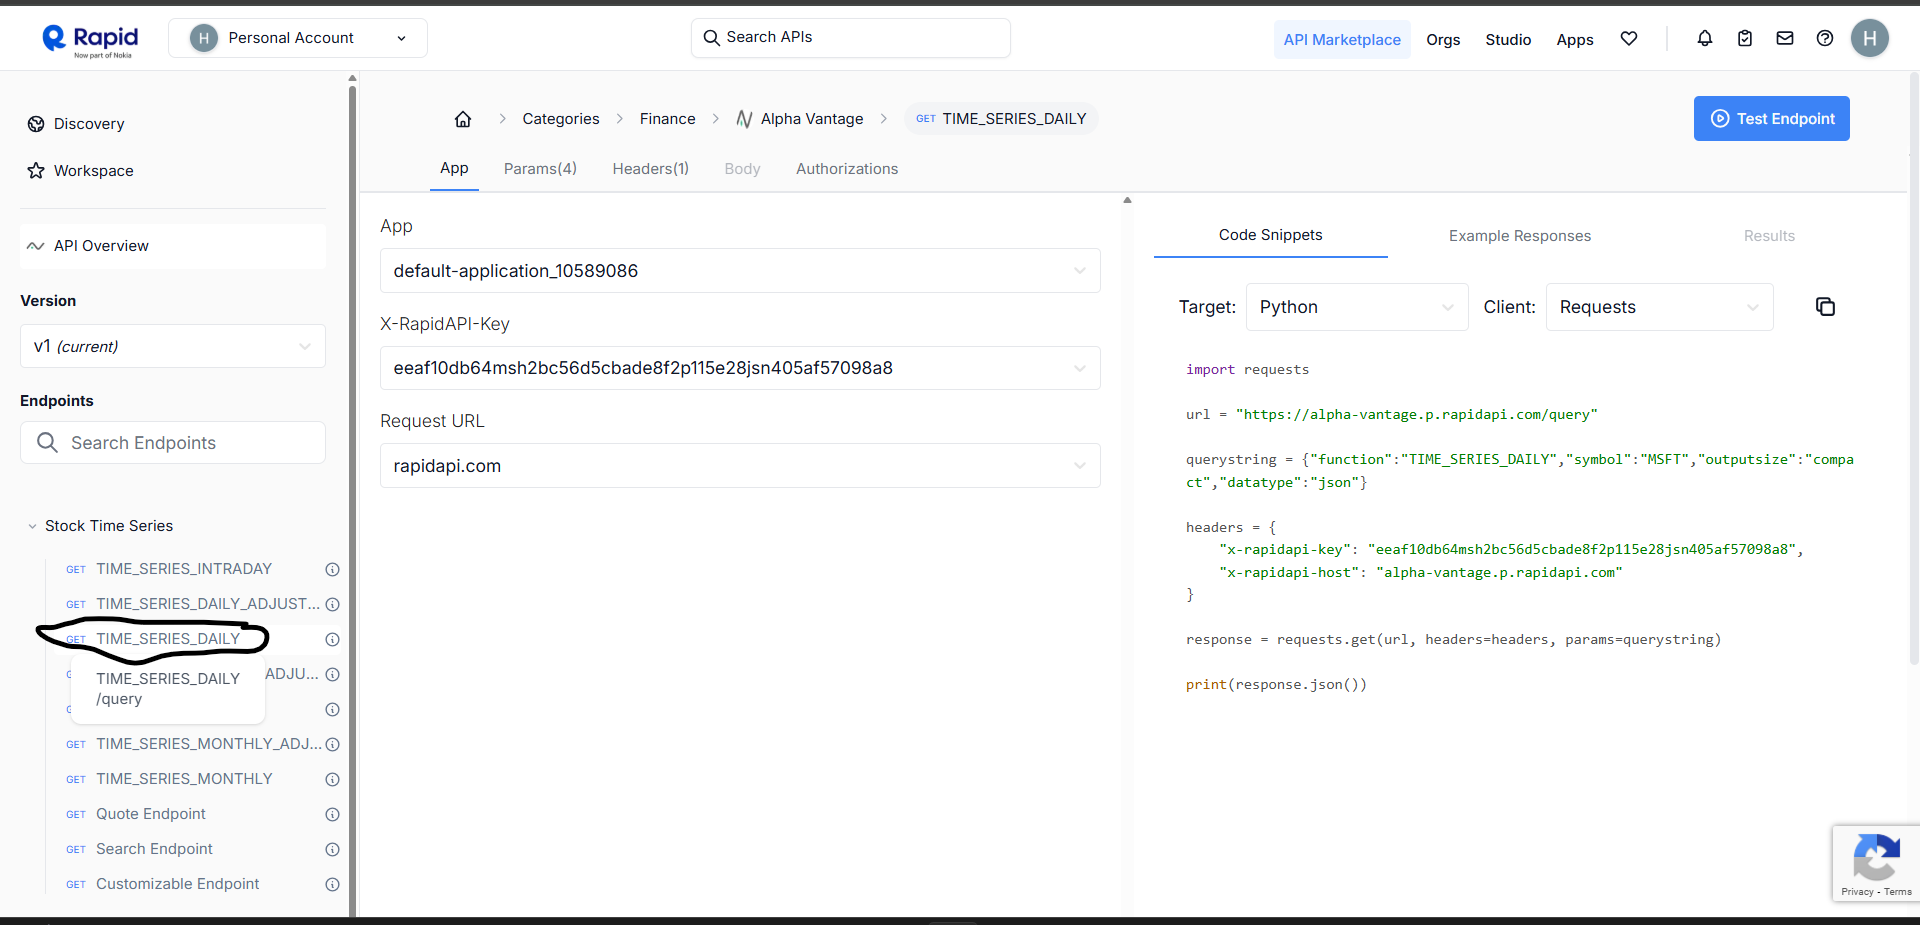

In [22]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"SBIN.BSE","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data2 = response.json()

In [23]:
data2

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SBIN.BSE',
  '3. Last Refreshed': '2025-05-14',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-05-14': {'1. open': '805.2500',
   '2. high': '807.4500',
   '3. low': '796.5000',
   '4. close': '800.3500',
   '5. volume': '1139114'},
  '2025-05-13': {'1. open': '800.4500',
   '2. high': '807.7000',
   '3. low': '797.2500',
   '4. close': '801.9000',
   '5. volume': '717454'},
  '2025-05-12': {'1. open': '799.8500',
   '2. high': '803.9000',
   '3. low': '793.1000',
   '4. close': '801.6000',
   '5. volume': '829415'},
  '2025-05-09': {'1. open': '755.2500',
   '2. high': '781.4000',
   '3. low': '755.2500',
   '4. close': '779.4000',
   '5. volume': '375997'},
  '2025-05-08': {'1. open': '778.0000',
   '2. high': '786.5000',
   '3. low': '765.0000',
   '4. close': '768.7500',
   '5. volume': '463248'},
  '2025-05-07': {'1. open': '762.2500

In [24]:
data2.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

### To Extract Time Series Daily Data

In [26]:
daily = data2["Time Series (Daily)"]
daily

{'2025-05-14': {'1. open': '805.2500',
  '2. high': '807.4500',
  '3. low': '796.5000',
  '4. close': '800.3500',
  '5. volume': '1139114'},
 '2025-05-13': {'1. open': '800.4500',
  '2. high': '807.7000',
  '3. low': '797.2500',
  '4. close': '801.9000',
  '5. volume': '717454'},
 '2025-05-12': {'1. open': '799.8500',
  '2. high': '803.9000',
  '3. low': '793.1000',
  '4. close': '801.6000',
  '5. volume': '829415'},
 '2025-05-09': {'1. open': '755.2500',
  '2. high': '781.4000',
  '3. low': '755.2500',
  '4. close': '779.4000',
  '5. volume': '375997'},
 '2025-05-08': {'1. open': '778.0000',
  '2. high': '786.5000',
  '3. low': '765.0000',
  '4. close': '768.7500',
  '5. volume': '463248'},
 '2025-05-07': {'1. open': '762.2500',
  '2. high': '782.5500',
  '3. low': '762.2500',
  '4. close': '776.1500',
  '5. volume': '581175'},
 '2025-05-06': {'1. open': '792.2000',
  '2. high': '799.0000',
  '3. low': '771.1500',
  '4. close': '774.1500',
  '5. volume': '761282'},
 '2025-05-05': {'1.

In [27]:
# TOTAL STOCKS TRADE IS COUNTED AS ITS VOLUME

In [28]:
import pandas as pd
df = pd.DataFrame(daily).T
df

,1. open,2. high,3. low,4. close,5. volume
2025-05-14,805.2500,807.4500,796.5000,800.3500,1139114
2025-05-13,800.4500,807.7000,797.2500,801.9000,717454
2025-05-12,799.8500,803.9000,793.1000,801.6000,829415
2025-05-09,755.2500,781.4000,755.2500,779.4000,375997
2025-05-08,778.0000,786.5000,765.0000,768.7500,463248
...,...,...,...,...,...
2024-12-20,833.8000,836.4000,810.0000,812.5000,467910
2024-12-19,822.0500,837.9000,820.1000,832.8000,309033
2024-12-18,850.2000,850.8000,836.7000,839.0500,172425
2024-12-17,859.7500,862.9500,847.1500,850.2000,143409


In [29]:
# By applying Tanspose option "T" rows and columns are interchanged - arranged in a proper way

In [30]:
df.index = pd.to_datetime(df.index)

In [31]:
df.index

DatetimeIndex(['2025-05-14', '2025-05-13', '2025-05-12', '2025-05-09',
               '2025-05-08', '2025-05-07', '2025-05-06', '2025-05-05',
               '2025-05-02', '2025-04-30', '2025-04-29', '2025-04-28',
               '2025-04-25', '2025-04-24', '2025-04-23', '2025-04-22',
               '2025-04-21', '2025-04-17', '2025-04-16', '2025-04-15',
               '2025-04-11', '2025-04-09', '2025-04-08', '2025-04-07',
               '2025-04-04', '2025-04-03', '2025-04-02', '2025-04-01',
               '2025-03-28', '2025-03-27', '2025-03-26', '2025-03-25',
               '2025-03-24', '2025-03-21', '2025-03-20', '2025-03-19',
               '2025-03-18', '2025-03-17', '2025-03-13', '2025-03-12',
               '2025-03-11', '2025-03-10', '2025-03-07', '2025-03-06',
               '2025-03-05', '2025-03-04', '2025-03-03', '2025-02-28',
               '2025-02-27', '2025-02-25', '2025-02-24', '2025-02-21',
               '2025-02-20', '2025-02-19', '2025-02-18', '2025-02-17',
      

In [32]:
# timely data has been mentioned

In [33]:
# Can check with actual data on yahoo finance online

In [34]:
df.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [35]:
df = df.astype(float)

In [36]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
2025-05-14,805.25,807.45,796.50,800.35,1139114.0
2025-05-13,800.45,807.70,797.25,801.90,717454.0
2025-05-12,799.85,803.90,793.10,801.60,829415.0
2025-05-09,755.25,781.40,755.25,779.40,375997.0
2025-05-08,778.00,786.50,765.00,768.75,463248.0


In [37]:
df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [38]:
df.index.name = "Date"

In [39]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-05-14,805.25,807.45,796.50,800.35,1139114.0
2025-05-13,800.45,807.70,797.25,801.90,717454.0
2025-05-12,799.85,803.90,793.10,801.60,829415.0
2025-05-09,755.25,781.40,755.25,779.40,375997.0
2025-05-08,778.00,786.50,765.00,768.75,463248.0


### To save the file

In [43]:
df.to_csv("SBI.csv")

### Plotting above result - For that we have candle stick chart

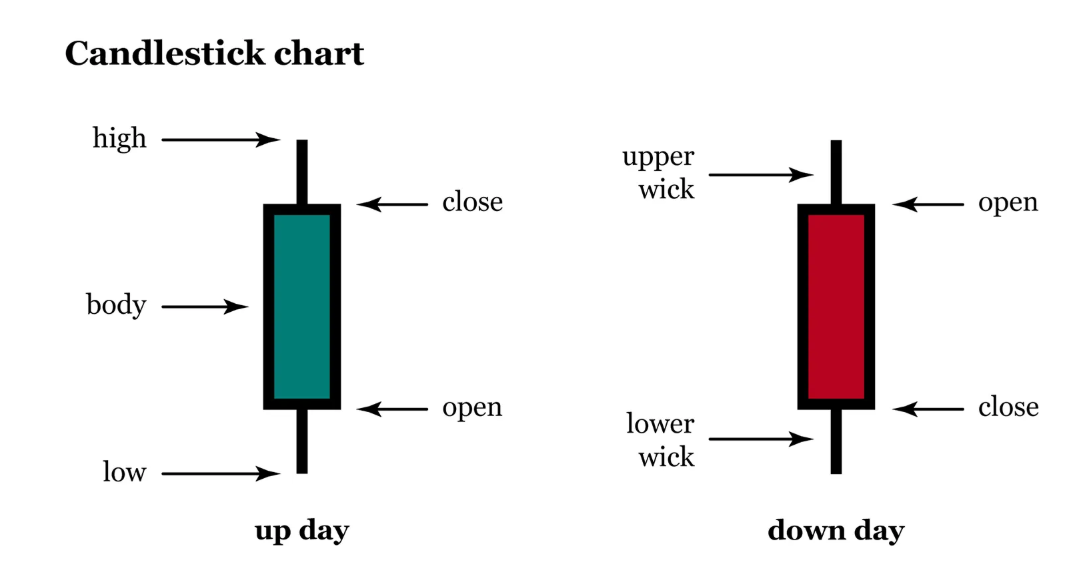

In [44]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import plotly.graph_objects as go

In [47]:
fig = go.Figure(
    data = [
        go.Candlestick(
            x = df.index,
            open = df["1. open"],
            high = df["2. high"],
            low = df["3. low"],
            close = df["4. close"]
        )
    ]
)
fig.update_layout(width = 1200,height = 800)

fig.show()

### Create a class to get data for any company

In [48]:
class StockAPI:

    def __init__(self):
        self.api_key = os.getenv("API_KEY")
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": self.api_key,
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def symbol_search(self, company: str):
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()
        d = {}
        for i in data["bestMatches"]:
            symbol = i["1. symbol"]
            d[symbol] = [i["2. name"], i["4. region"], i["8. currency"]]

        return d

    def get_daily_prices(self, symbol: str):
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()
        daily = data["Time Series (Daily)"]
        df = pd.DataFrame(daily).T
        df.index = pd.to_datetime(df.index)
        df.index.name = "Date"
        df = df.astype(float)
        return df

    def plot_candlestick(self, df: pd.DataFrame):
        fig = go.Figure(
            data=[
                go.Candlestick(
                    x=df.index,
                    open=df["1. open"],
                    high=df["2. high"],
                    low=df["3. low"],
                    close=df["4. close"],
                )
            ]
        )

        fig.update_layout(width=1200, height=800)

        return fig

### USING ABOVE DATA - WE GET STOCK VALUES FOR EACH AND EVERY PART

In [49]:
client = StockAPI()

In [50]:
client.symbol_search("HDFC Bank")

{'HDB': ['HDFC Bank Ltd', 'United States', 'USD'],
 'HDFCBANK.BSE': ['HDFC Bank Limited', 'India/Bombay', 'INR'],
 'H1DB34.SAO': ['HDFC Bank Limited', 'Brazil/Sao Paolo', 'BRL'],
 'HDFA.FRK': ['HDFC Bank Limited', 'Frankfurt', 'EUR']}

In [51]:
df3 = client.get_daily_prices("HDFCBANK.BSE")
df3

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-05-14,1923.95,1930.20,1903.15,1910.80,165682.0
2025-05-13,1944.05,1962.30,1920.50,1923.10,538724.0
2025-05-12,1920.00,1960.00,1914.00,1957.55,327403.0
2025-05-09,1905.15,1919.00,1886.45,1889.20,107594.0
2025-05-08,1955.00,1955.00,1918.10,1926.30,331040.0
...,...,...,...,...,...
2024-12-20,1787.95,1797.35,1766.90,1772.05,249342.0
2024-12-19,1795.05,1800.20,1779.00,1793.45,186084.0
2024-12-18,1832.50,1835.65,1807.45,1811.20,102823.0


In [52]:
df3.to_csv("HDFCBank.csv")

In [53]:
fig2 = client.plot_candlestick(df3)
fig2.show()

In [54]:
client.symbol_search("Tesla")

{'TSLA': ['Tesla Inc', 'United States', 'USD'],
 'TL0.DEX': ['Tesla Inc', 'XETRA', 'EUR'],
 'TL0.FRK': ['Tesla Inc', 'Frankfurt', 'EUR'],
 'TSLA34.SAO': ['Tesla Inc', 'Brazil/Sao Paolo', 'BRL'],
 'TSLA.TRT': ['Tesla CDR (CAD Hedged)', 'Toronto', 'CAD'],
 'TL01.FRK': ['TESLA INC. CDR DL-001', 'Frankfurt', 'EUR']}

In [55]:
df4 = client.get_daily_prices("TSLA")
df4.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-05-14,342.50,350.0000,337.00,347.68,136997264.0
2025-05-13,320.00,337.5894,316.80,334.07,136992574.0
2025-05-12,321.99,322.2100,311.50,318.38,112826661.0
2025-05-09,290.21,307.0400,290.00,298.26,132387835.0
2025-05-08,279.63,289.8000,279.41,284.82,97539448.0


In [56]:
df4.to_csv("Tesla.csv")

In [58]:
client.plot_candlestick(df4)